# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [93]:
import pandas as pd
import numpy as np
import random as rnd

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


In [94]:
movies_stream = pd.read_csv("data/moviestreams exported2.csv")
movies_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3258 non-null   int64  
 1   ID               3258 non-null   int64  
 2   Title            3258 non-null   object 
 3   Year             3258 non-null   int64  
 4   Age              3258 non-null   int64  
 5   IMDb             3258 non-null   float64
 6   Rotten Tomatoes  3258 non-null   int64  
 7   Netflix          3258 non-null   int64  
 8   Hulu             3258 non-null   int64  
 9   Prime Video      3258 non-null   int64  
 10  Disney+          3258 non-null   int64  
 11  Type             3258 non-null   int64  
 12  Directors        3258 non-null   object 
 13  Genres           3258 non-null   object 
 14  Country          3258 non-null   object 
 15  Language         3258 non-null   object 
 16  Runtime          3258 non-null   float64
dtypes: float64(2),

In [95]:
movies_stream.shape

(3258, 17)

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

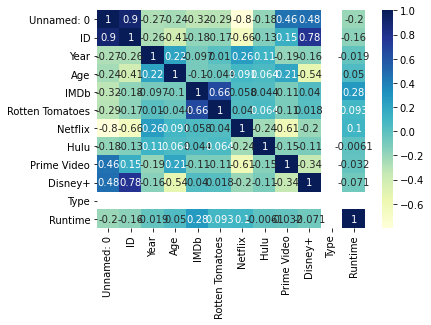

In [96]:
sns.heatmap(movies_stream.corr(), cmap="YlGnBu", annot = True)
plt.show()A

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [97]:

# Creating X and y
X = movies_stream['Age']
y = movies_stream['Runtime']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [66]:
X_train


528     13
16      13
1146    18
1641    18
1409    18
        ..
1930    18
79      18
1859    18
2840    18
1544    18
Name: Age, Length: 2280, dtype: int64

In [67]:
y_train

528      97.0
16      127.0
1146    110.0
1641    119.0
1409    110.0
        ...  
1930    104.0
79      138.0
1859    149.0
2840     90.0
1544     98.0
Name: Runtime, Length: 2280, dtype: float64

In [68]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [69]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    101.178460
Age        0.129074
dtype: float64

In [70]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Runtime   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.091
Date:                Mon, 07 Mar 2022   Prob (F-statistic):             0.0788
Time:                        00:17:41   Log-Likelihood:                -9990.9
No. Observations:                2280   AIC:                         1.999e+04
Df Residuals:                    2278   BIC:                         2.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.1785      1.089     92.919      0.000      99.043     103.314
Age            0.1291      0.073      1.758      0.079      -0.015       0.273
==============================================================================
Omnibus:                      661.173   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3297.856
Skew:                           1.290   Prob(JB):                         0.00
Kurtosis:                       8.297   Cond. No.                         40.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

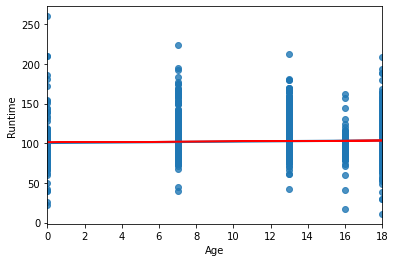

In [113]:
# Visualizing the regression line
sns.regplot(X,y, ci=None)
plt.plot(X_train, 101.1785 + 0.1291*X_train, 'r')
plt.show()

In [114]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

## Error Terms

Finally, plot your error terms!

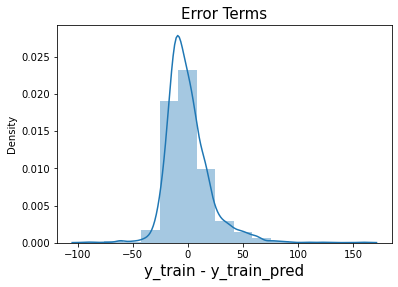

In [115]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [116]:
#As we can see, the residuals are following the normal distribution graph with a mean 0.

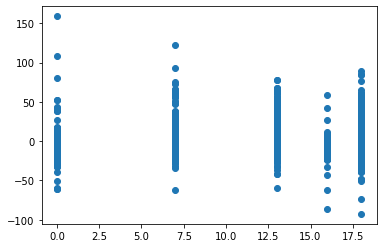

In [117]:
plt.scatter(X_train,res)
plt.show()

In [118]:
#Since the Residuals follow a normal distribution and do not follow any specific pattern, we can use the linear regression model
#we have built to evaluate test data.

In [119]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

291     103.501789
1773    103.501789
416     102.856420
2236    101.178460
585     103.501789
           ...    
401     102.856420
2591    102.081977
289     103.243641
2114    103.501789
2348    102.856420
Length: 978, dtype: float64

In [120]:
#Now, let’s calculate the R² value for the above-predicted y-values.
#We can do that by merely importing the r2_score library from sklearn.metrics package.

In [121]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.0038855742517864833

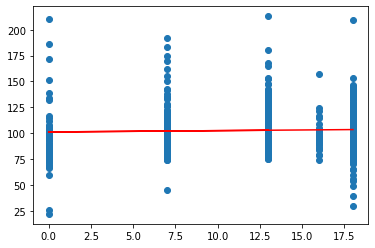

In [122]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [123]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [124]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(2280, 1)
(978, 1)


In [125]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [126]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 101.17845986850449
Slope : [0.12907384]


In [127]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.001355255757209295
0.0038855742517864833


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really

In [ ]:
# 0.0038855742517864833

In [ ]:
#Based on R-squared value it is small so  predictive analysis was not my best tybe for my dataset.

In [ ]:
#  bell curve